### Telecom Churn Case Study

### Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [471]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Stage 1 : Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [472]:
telecom=pd.read_csv('telecom_churn_data.csv')

In [473]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [474]:
# Check the Shape of the dataframe
nRow, nCol = telecom.shape
print("There are ",nRow ,"rows and ",nCol," columns")
telecom.shape

There are  99999 rows and  226  columns


(99999, 226)

In [475]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [476]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

- ### The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.
- ### The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

In [477]:
# Drop the most redundant columns
telecom.drop(['mobile_number','circle_id'],1,inplace=True)

In [588]:
telecom.shape

(99999, 220)

- ### In churn prediction, we assume that there are three phases of customer lifecycle :
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

- ### In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### You can take the following suggestive steps to build the model:

- Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

- Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

- Derive new features.

- Reduce the number of variables using PCA.

- Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

- Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

- Finally, choose a model based on some evaluation metric.


# Filter High Value Customers

- ###  High-value customers : Those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase)
- Let's dervie features to extract high value customers
-  Let's find out total amount spent by customers on data recharge, we have two colums available to find this out 
- first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
- second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)
- Let's introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x


### Lets filter all the recharge columns and analyse


In [478]:
rech_cols=telecom.columns[telecom.columns.str.contains('rech_data|rech_amt')]
rech_cols


Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [479]:
# Lets look for null values
telecom[rech_cols].isnull().mean()*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [480]:
telecom[rech_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#### We can see that the missing count for 'date_of_last_rech_data_x' ,  'total_rech_data_x',   'max_rech_data_x' and  'av_rech_amt_data_x' have the same missing percentage. That means the user hasn't done any recharge for the period hence we can impute those with 0

In [481]:

telecom['total_rech_data_6']=telecom['total_rech_data_6'].fillna(0)
telecom['total_rech_data_7']=telecom['total_rech_data_7'].fillna(0)
telecom['total_rech_data_8']=telecom['total_rech_data_8'].fillna(0)
telecom['total_rech_data_9']=telecom['total_rech_data_9'].fillna(0)

In [482]:

telecom['date_of_last_rech_data_6']=telecom['date_of_last_rech_data_6'].fillna(0)
telecom['date_of_last_rech_data_7']=telecom['date_of_last_rech_data_7'].fillna(0)
telecom['date_of_last_rech_data_8']=telecom['date_of_last_rech_data_8'].fillna(0)
telecom['date_of_last_rech_data_9']=telecom['date_of_last_rech_data_9'].fillna(0)


In [483]:

telecom['max_rech_data_6']=telecom['max_rech_data_6'].fillna(0)
telecom['max_rech_data_7']=telecom['max_rech_data_7'].fillna(0)
telecom['max_rech_data_8']=telecom['max_rech_data_8'].fillna(0)
telecom['max_rech_data_9']=telecom['max_rech_data_9'].fillna(0)


In [484]:

telecom['av_rech_amt_data_6']=telecom['av_rech_amt_data_6'].fillna(0)
telecom['av_rech_amt_data_7']=telecom['av_rech_amt_data_7'].fillna(0)
telecom['av_rech_amt_data_8']=telecom['av_rech_amt_data_8'].fillna(0)
telecom['av_rech_amt_data_9']=telecom['av_rech_amt_data_9'].fillna(0)


### There is no month wise total DATA recharge amount provided, hence we need to multiply the number of data recharges with the average recharge amount for that particular month


In [485]:
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']

telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']

telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']

telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']



#### Now we can drop the abvoe columns to avoid multi collinearity


In [486]:
telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

#### Let's find out the average recharge done in the first two months(june & july) - The good phase

#### Total amount spend would be the sum of total data recharge done & total call/sms recharges


In [487]:
avg_rech_6n7 = (telecom['total_rech_amt_6'].fillna(0) 
+ telecom['total_rech_amt_7'].fillna(0) 
+ telecom['total_rech_data_amt_6'].fillna(0) 
+ telecom['total_rech_data_amt_7'].fillna(0))/2



#### Let's take 70 percentile of the calculated average amount


In [488]:
perc_70_6n7 = np.percentile(avg_rech_6n7, 70.0)
print("70 percentile is : ", perc_70_6n7)

70 percentile is :  478.0



### Filter the given data set for 70-th percentile, those will be the high valued customers of our interest.


In [489]:
telecom_hv_cust = telecom[avg_rech_6n7 >= perc_70_6n7]
print("Dimensions of the filtered dataset:",telecom_hv_cust.shape)

Dimensions of the filtered dataset: (30001, 220)


In [490]:
# Filter the 9th month columns for further analysis
month_9=list(filter(lambda x:'_9' in x,list(telecom_hv_cust.columns)))
month_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_rech_dat

#### Now we need to figure out the target variable 'churn' value from the 9th month data , values would be either 1 (churn) or 0 (non-churn)

#### We will calculate churn/non-churn based on the 9th month usage as mentioned in the problem statement

In [491]:
telecom_hv_cust['churn'] = np.where(telecom_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_hv_cust.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/


### Lets drop the 9-th month features, those are no longer needed for the analysis


In [492]:
telecom_hv_cust.drop(month_9,1,inplace=True)

In [493]:
telecom_hv_cust.shape

(30001, 168)

In [494]:
# lets find out churn/non churn percentage
telecom_hv_cust['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

<AxesSubplot:>

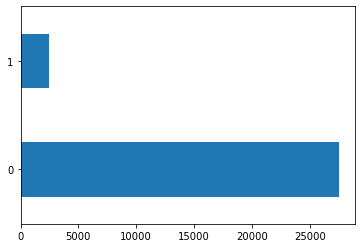

In [495]:
# Check the unique values count in churn column
telecom_hv_cust['churn'].value_counts().plot(kind='barh')

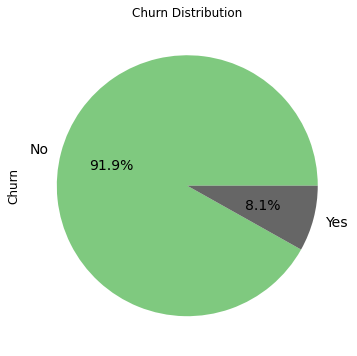

In [496]:
#Churn Distribution
pie_chart = telecom_hv_cust['churn'].value_counts()*100.0 /len(telecom_hv_cust)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14,cmap='Accent' )  
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()


### There is significant data imbalance w.r.t. the target variable 'churn'. Hence we need to do some resampling before applying any models on the dataset


- ###  Let's check the columns with no variance in their values and drop such columns


In [497]:
drop_unique_cols=[]

for i in telecom_hv_cust.columns:
    if telecom_hv_cust[i].nunique() ==1:
        drop_unique_cols.append(i)
        
telecom_hv_cust.drop(drop_unique_cols,axis=1,inplace = True)

print('Dropped columns are: \n',drop_unique_cols)


Dropped columns are: 
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [498]:
telecom_hv_cust.shape

(30001, 156)


###  Stage 2 : Missing Value Treatment


In [499]:
missing=(telecom_hv_cust.isnull().mean()*100).sort_values(ascending=False)
missing

fb_user_8                   46.825106
arpu_2g_8                   46.825106
arpu_3g_8                   46.825106
night_pck_user_8            46.825106
count_rech_3g_8             46.825106
count_rech_2g_8             46.825106
night_pck_user_6            44.148528
arpu_3g_6                   44.148528
count_rech_3g_6             44.148528
fb_user_6                   44.148528
count_rech_2g_6             44.148528
arpu_2g_6                   44.148528
count_rech_2g_7             43.145228
arpu_2g_7                   43.145228
night_pck_user_7            43.145228
fb_user_7                   43.145228
count_rech_3g_7             43.145228
arpu_3g_7                   43.145228
std_og_mou_8                 3.913203
std_ic_mou_8                 3.913203
isd_og_mou_8                 3.913203
spl_og_mou_8                 3.913203
isd_ic_mou_8                 3.913203
og_others_8                  3.913203
ic_others_8                  3.913203
loc_ic_t2t_mou_8             3.913203
loc_ic_t2m_m


### Will drop columns with missing values more than 30%


In [500]:
Drop_cols=missing[missing.values>30].index
Drop_cols=list(Drop_cols)
Drop_cols

['fb_user_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'night_pck_user_6',
 'arpu_3g_6',
 'count_rech_3g_6',
 'fb_user_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'count_rech_2g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7',
 'count_rech_3g_7',
 'arpu_3g_7']

In [501]:
telecom_hv_cust.drop(Drop_cols,1,inplace=True)
telecom_hv_cust.shape

(30001, 138)

In [502]:
(telecom_hv_cust.isnull().mean()*100).sort_values(ascending=False)

std_ic_mou_8                3.913203
std_og_mou_8                3.913203
loc_og_t2f_mou_8            3.913203
loc_og_t2c_mou_8            3.913203
loc_og_mou_8                3.913203
std_og_t2t_mou_8            3.913203
std_og_t2m_mou_8            3.913203
std_og_t2f_mou_8            3.913203
std_ic_t2f_mou_8            3.913203
isd_og_mou_8                3.913203
loc_og_t2m_mou_8            3.913203
spl_og_mou_8                3.913203
std_ic_t2m_mou_8            3.913203
og_others_8                 3.913203
std_ic_t2t_mou_8            3.913203
loc_ic_t2t_mou_8            3.913203
loc_ic_mou_8                3.913203
loc_ic_t2m_mou_8            3.913203
spl_ic_mou_8                3.913203
loc_ic_t2f_mou_8            3.913203
onnet_mou_8                 3.913203
ic_others_8                 3.913203
isd_ic_mou_8                3.913203
offnet_mou_8                3.913203
roam_og_mou_8               3.913203
roam_ic_mou_8               3.913203
loc_og_t2t_mou_8            3.913203
d


**Analysis:** The remaining missing values are all in the Minutes of Usage columns and the maximum missing % is around 3.91 , that means, the customer has not used the particular call type, hence we can fill the missing values with zero.


In [503]:
telecom_hv_cust=telecom_hv_cust.fillna(0)

In [504]:
telecom_hv_cust.shape

(30001, 138)

In [505]:
# Filter the 9th month columns for further analysis
date_cols=list(filter(lambda x:'date' in x,list(telecom_hv_cust.columns)))
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [506]:
# We will drop all the date columns since this will not add any more values to the analysis

telecom_hv_cust.drop(date_cols,1,inplace=True)

telecom_hv_cust.shape


(30001, 132)

<AxesSubplot:>

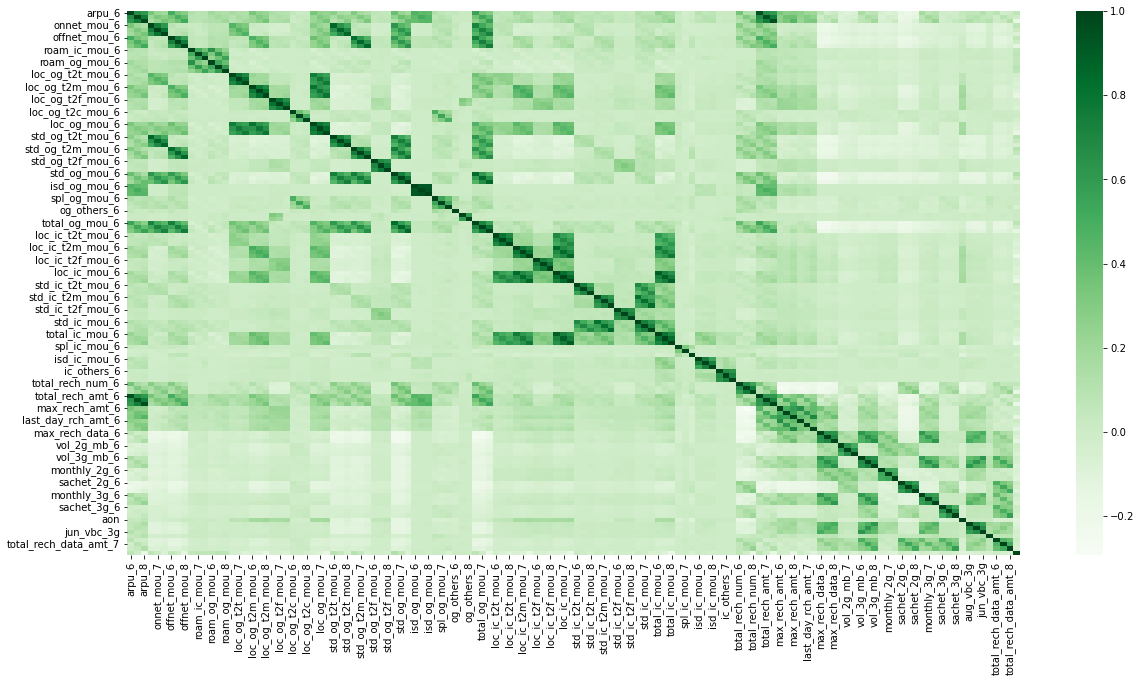

In [507]:
# Correlation heatmap

plt.figure(figsize=(20,10))

sns.heatmap(telecom_hv_cust.corr(),cmap='Greens')



#### Finding : There are some strong multicollinearity spotted


In [508]:

df = telecom_hv_cust.select_dtypes(include =[np.number])

df.shape


(30001, 132)

In [509]:
# let's create a new dataframe 'tenure_data' for the purpose
tenure_data = telecom_hv_cust.copy()

In [510]:
plt.figure(figsize=(14,8))

# aon --> Age on network - number of days the customer is using the operator T network, we will convert this to months

tenure_data['tenure'] = tenure_data['aon']/30

tenure_data['tenure'].head()


0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: tenure, dtype: float64

<Figure size 1008x576 with 0 Axes>

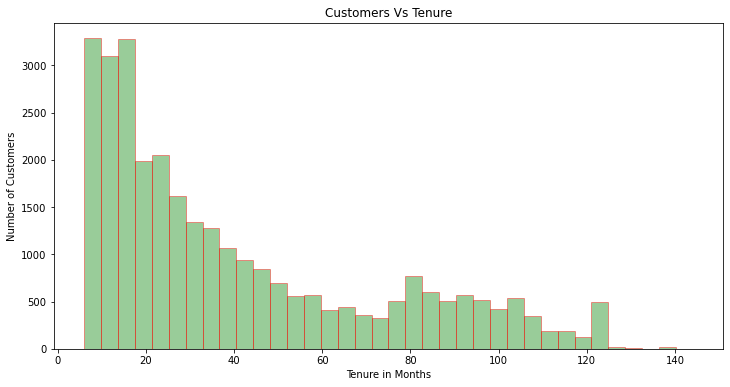

In [511]:
plt.figure(figsize=(12,6))

ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'Green',
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('Number of Customers')

ax.set_xlabel('Tenure in Months')

ax.set_title('Customers Vs Tenure')

plt.show()


In [512]:
# We will do some variable transformation and binning for better understanding

tn_range = [0, 6, 12, 24, 60, 61]

tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']

tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)

tenure_data['tenure_range'].head()


0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

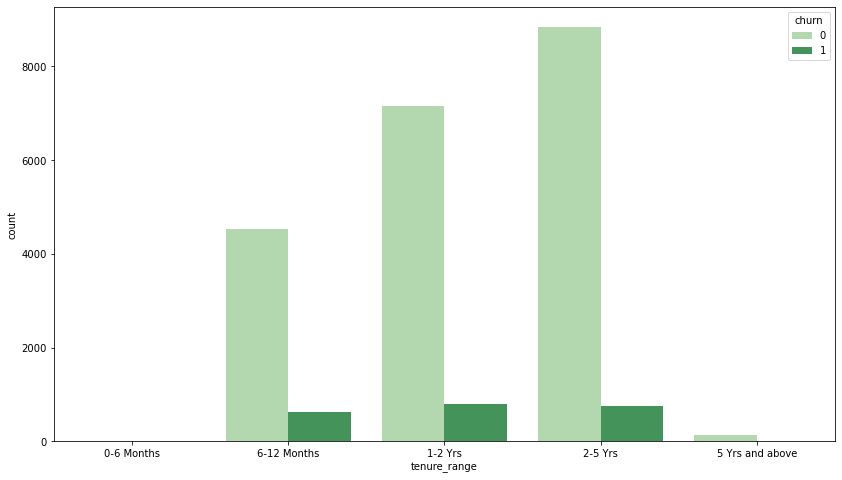

In [513]:

plt.figure(figsize=(14,8))

sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("Greens"))

plt.show()


In [514]:
# Lets define a custom function to plot heatmaps
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    
    sns.heatmap(dataframe.corr(),cmap="Greens",annot=True)
    
    plt.show()
    

In [515]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for months 6,7 and 8

mou_og_cols = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('.*_og_.*mou_',regex=True)]

mou_og_cols


Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

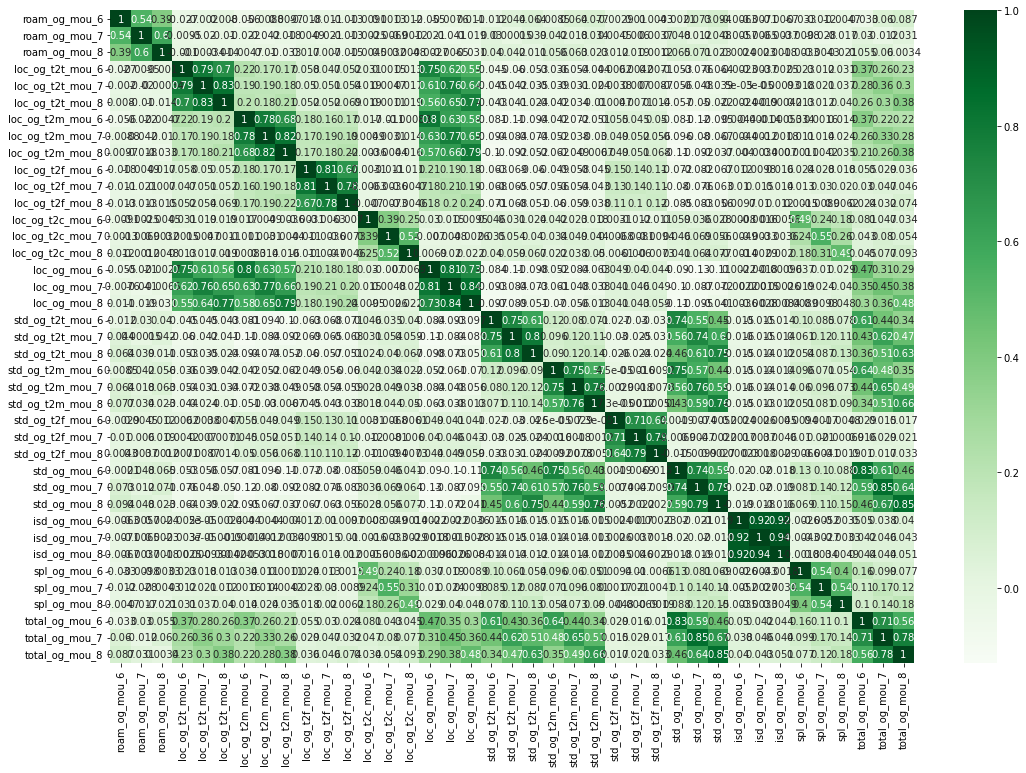

In [516]:
heatmap(18,12,telecom_hv_cust.filter(mou_og_cols))

#### Analysis: We can see that total_og_mou_x, std_og_mou_x and loc_og_mou_x seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [517]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for month 6
mou_og_cols=list(telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('total_og_mou_|std_og_mou_|loc_og_mou_')])
mou_og_cols


['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [518]:
#Let's drop the higly correlated outgoing minutes of usage columns
telecom_hv_cust.drop(mou_og_cols,1,inplace=True)

In [519]:
telecom_hv_cust.shape

(30001, 123)

In [520]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for months 6,7 and 8
mou_ic_cols = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('.*_ic_.*mou_',regex=True)]
mou_ic_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

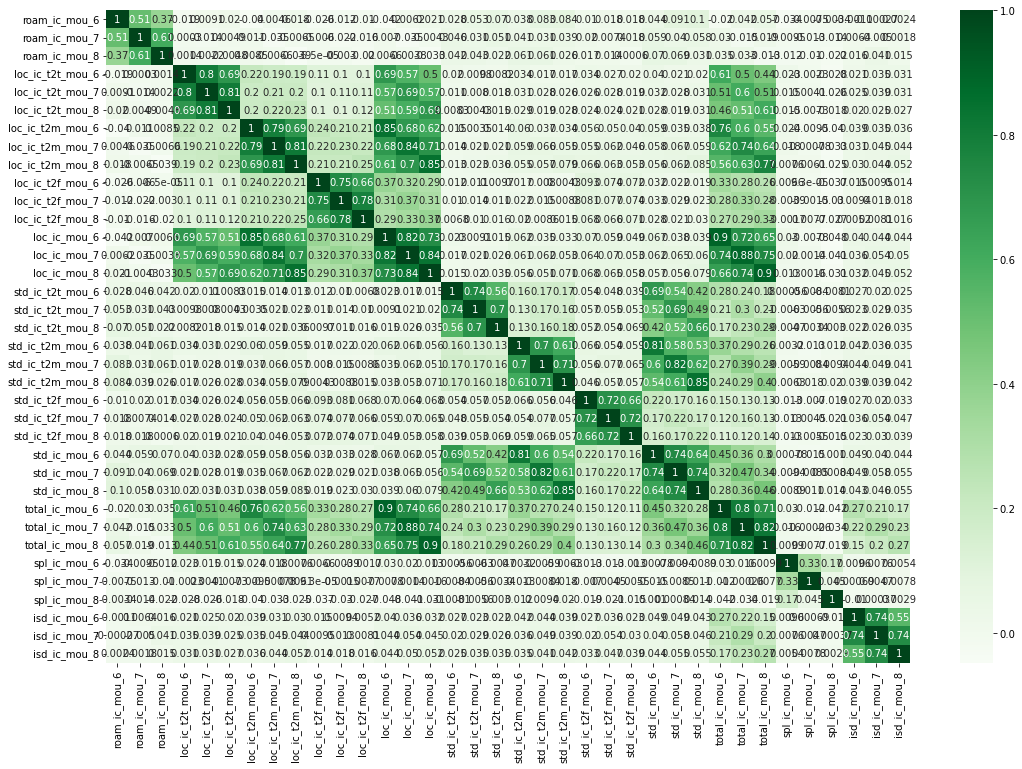

In [521]:
heatmap(18,12,telecom_hv_cust.filter(mou_ic_cols))


#### Analysis: We can see that total_ic_mou_x, std_ic_mou_x and loc_ic_mou_x seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.


In [522]:
mou_ic_cols=list(telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('total_ic_mou_|std_ic_mou_|loc_ic_mou_')])

mou_ic_cols


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [523]:
#Let's drop the higly correlated incoming minutes of usage columns

telecom_hv_cust.drop(mou_ic_cols,1,inplace=True)

In [524]:
telecom_hv_cust.shape

(30001, 114)

In [525]:
def plot_mean_bar_chart(df,columns_list):
    
    df_0 = df[df.churn==0].filter(columns_list)
    
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0,color=['green','grey'])
    
    plt.show()
    
    return mean_bar


In [526]:
# create box plot for  6th, 7th and 8th month

def plot_box_chart(col):
    
    plt.figure(figsize=(20,16))
    
    df = telecom_hv_cust
    
    plt.subplot(2,3,1)
    
    sns.boxplot(data=telecom_hv_cust, y=col+"_6",x="churn",hue="churn",
                showfliers=False,palette=("Greens"))
    
    plt.subplot(2,3,2)
    
    sns.boxplot(data=telecom_hv_cust, y=col+"_7",x="churn",hue="churn",
                
                showfliers=False,palette=("Greens"))
    plt.subplot(2,3,3)
    
    sns.boxplot(data=telecom_hv_cust, y=col+"_8",x="churn",hue="churn",
                showfliers=False,palette=("Greens"))
    plt.show()

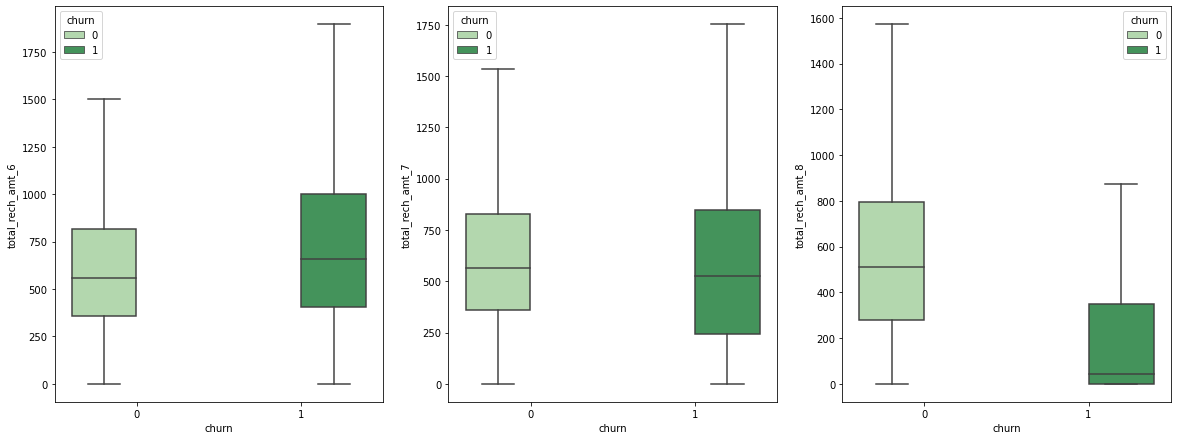

In [527]:
# Ploting Total recharge amount:

plot_box_chart('total_rech_amt')



#### Finding : We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).


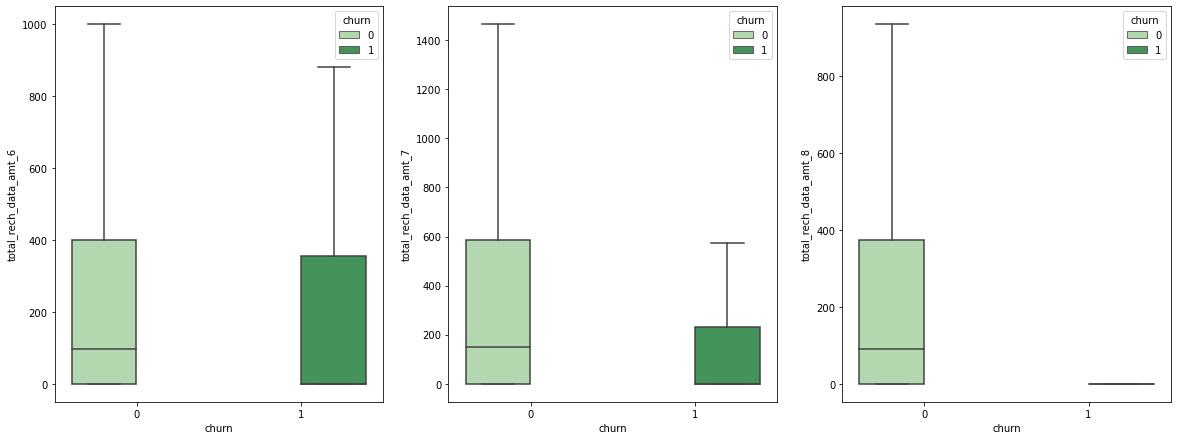

In [528]:
# Ploting for total recharge amount for data:

plot_box_chart('total_rech_data_amt')


#### Finding : We can see that there is a huge drop(nrgligibly less) in total recharge amount for data in the 8th month (action phase) for churned customers.

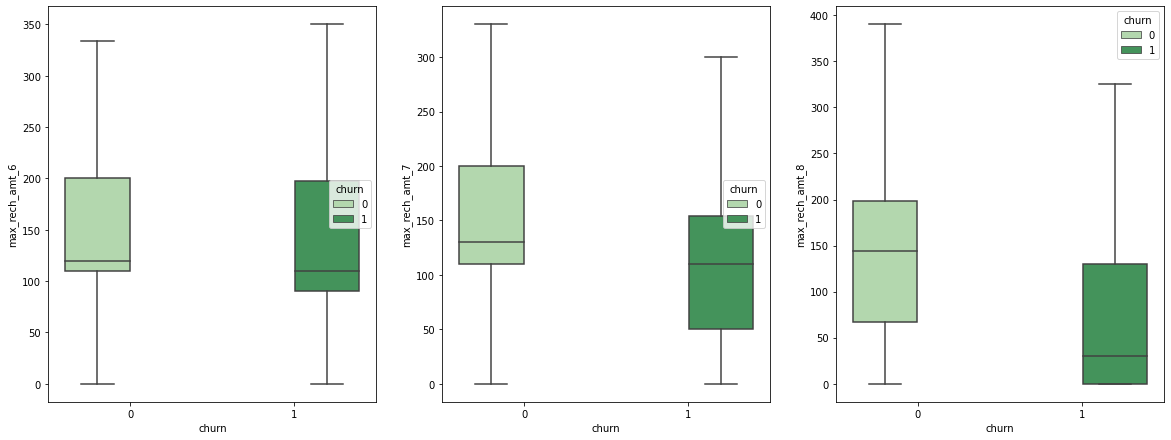

In [529]:
# Ploting for Maximum recharge amount for data:

plot_box_chart('max_rech_amt')



#### Finding : We can see the drop for max_rech_amt in the 8th month


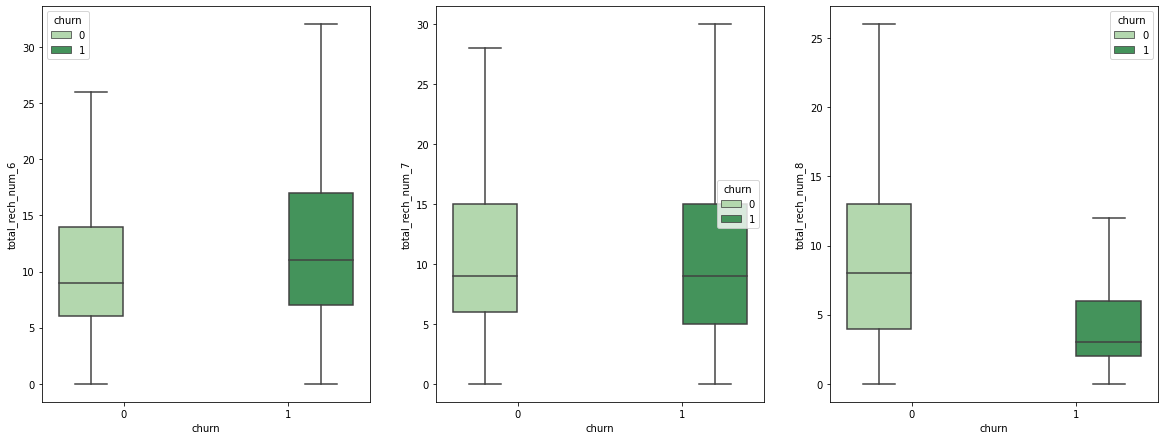

In [530]:
# # Ploting for Total number of rechargs

plot_box_chart('total_rech_num')



#### Finding : We can see the drop for total_rech_num in the 8th month


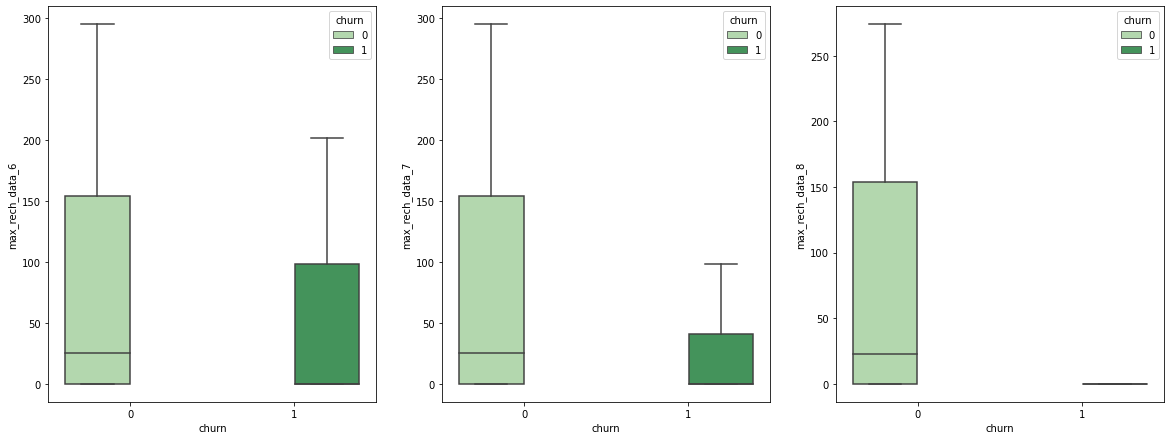

In [531]:
# # Ploting for Maximum recharge data

plot_box_chart('max_rech_data')



#### Finding :We can see that there is a huge drop in maximum data recharge in the 8th month (action phase) for churned customers.


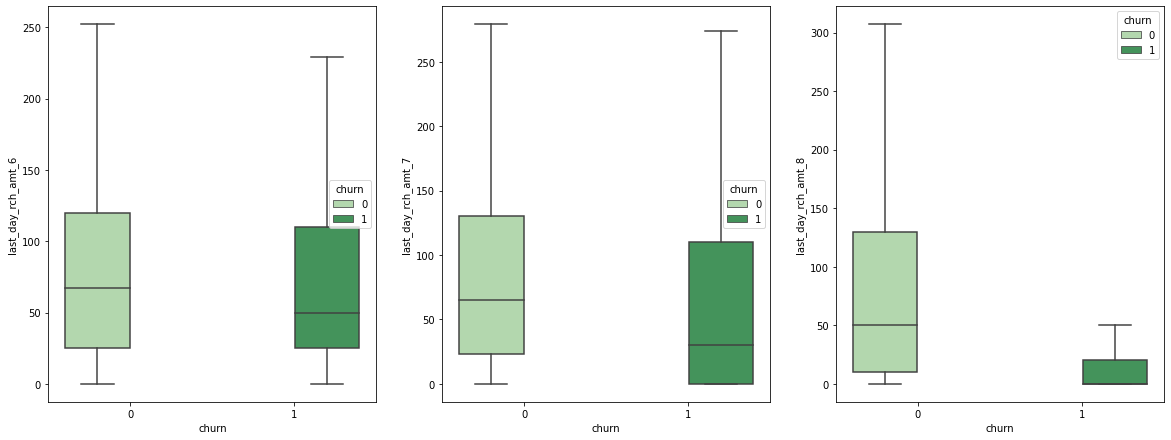

In [532]:
# Ploting for last day recharge amount:

plot_box_chart('last_day_rch_amt')


#### Finding :We can see that there is a huge drop in last day recharge amount in the 8th month (action phase) for churned customers.


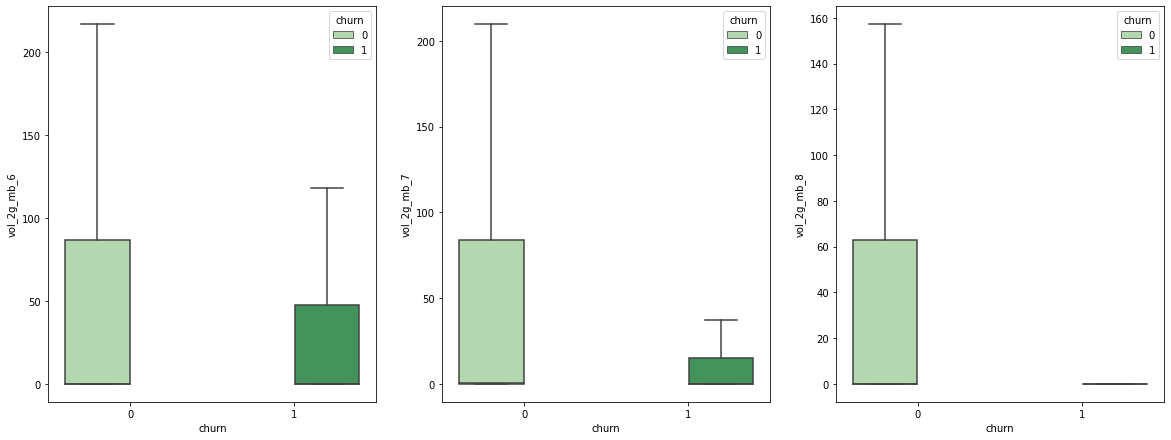

In [533]:
# Ploting for volume of 2G usage columns:

plot_box_chart('vol_2g_mb')


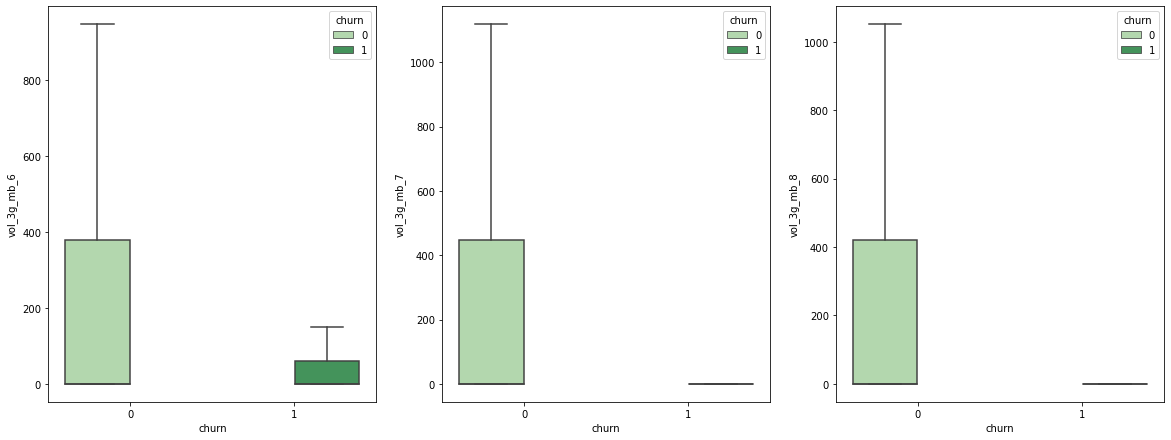

In [534]:
# Ploting for volume of 3G usage columns:

plot_box_chart('vol_3g_mb')



-  #### We have two observations from above: 2G and 3G usage for churned customers dropped in the 8th month
-  #### Also 2G/3G usage is higher for non-churned customers.


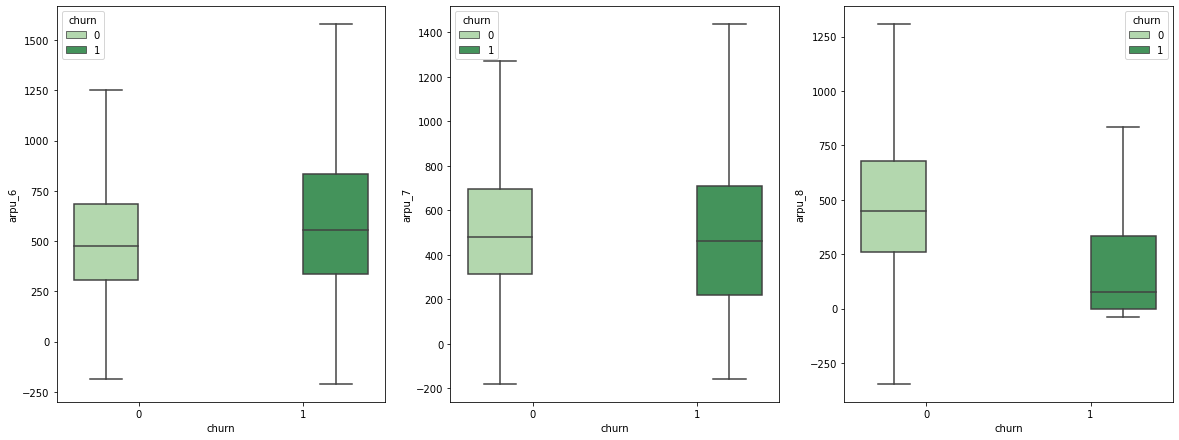

In [535]:
# Plotting average Revenue Per User

plot_box_chart('arpu')


#### We can see that huge drops for Average revenue per user in 8th month for churned customers

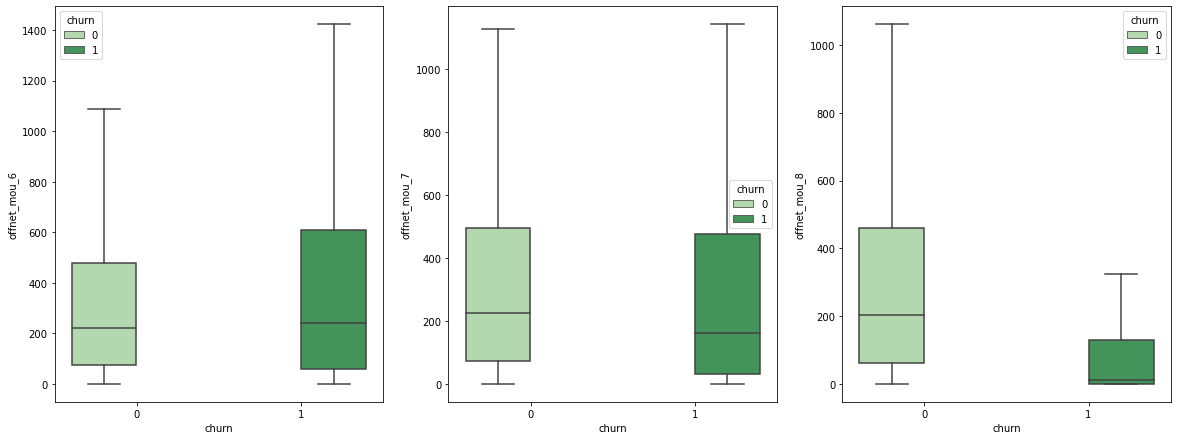

In [536]:
# Offnet Minutes of Usage for churned and non churned customers (OFFNET : All kind of calls outside the same operator network)

plot_box_chart('offnet_mou')


#### Finding : We can see the drop for Offnet minutes of usage services in the 8th month

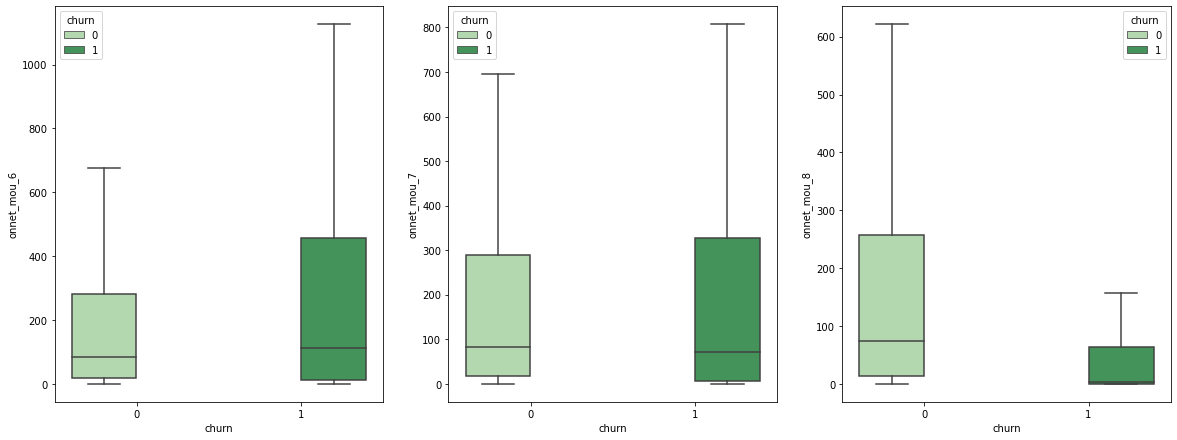

In [537]:
# Plotting Onnet Minutes of Usage for churned and non churned customers

plot_box_chart('onnet_mou')



#### Finding : We can see the drop for onnet minutes of usage services in the 8th month


In [538]:
monthly_subcription_2g_3g = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

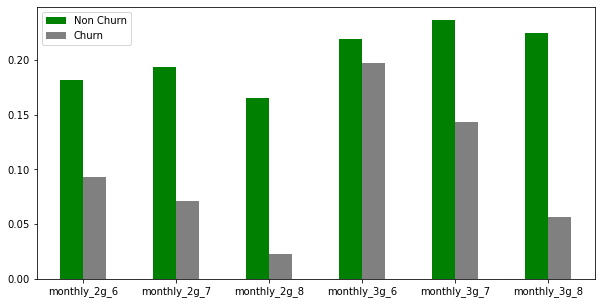

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churn,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [539]:
plot_mean_bar_chart(telecom_hv_cust, monthly_subcription_2g_3g)



#### Analysis: We can see a drop in monthly subscription for churned customers in the 8th Month


In [540]:

vbc_column = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('vbc_3g',regex=True)]

vbc_column.tolist()


['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [541]:
# Renaming month named vbc columns to 6,7,8,9 format

telecom_hv_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [542]:
# Dropping 9th month 

telecom_hv_cust.drop('vbc_3g_9',1,inplace=True)


In [543]:

vbc_column = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('vbc_3g',regex=True)]

vbc_column.tolist()


['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

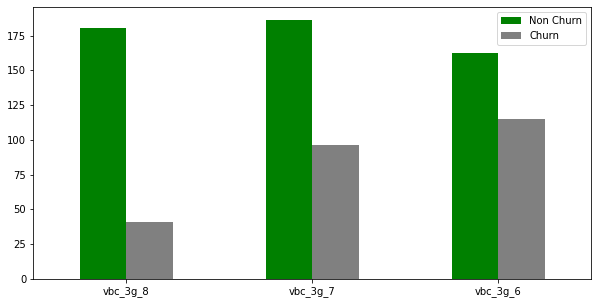

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.501280,186.206078,162.370343
Churn,40.851975,96.076317,115.096575


In [544]:

plot_mean_bar_chart(telecom_hv_cust, vbc_column)



#### Analysis - Volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in the 8th month


In [545]:
# Checking Service schemes with validity smaller than a month for 2G/3G

SC_2g_or_3g_col = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]


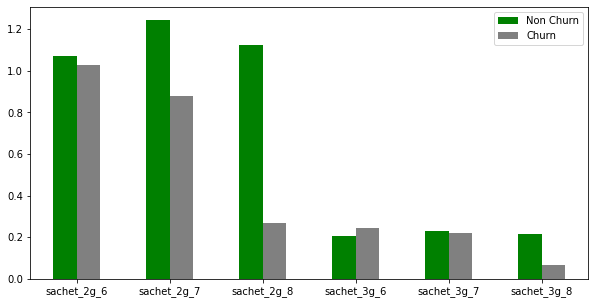

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.069303,1.243832,1.124383,0.206313,0.228048,0.214550
Churn,1.029496,0.877509,0.269971,0.244162,0.221221,0.065137


In [546]:

plot_mean_bar_chart(telecom_hv_cust, SC_2g_or_3g_col)


#### Analysis : We can see the drop in sachet services in 8th month for churned cutsomers

In [547]:

telecom_hv_cust.shape


(30001, 113)

In [548]:

cor_matrix = telecom_hv_cust.corr().abs()

print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

# we will drop the columns with high correlation (+/- 60%)
                 
telecom_hv_cust.drop(to_drop, axis=1, inplace=True)

print('Dropped columns which have high correlation are :',to_drop )


                         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.671732  0.612617     0.342438     0.216136   
arpu_7                 0.671732  1.000000  0.759858     0.211608     0.320818   
arpu_8                 0.612617  0.759858  1.000000     0.151677     0.233728   
onnet_mou_6            0.342438  0.211608  0.151677     1.000000     0.750708   
onnet_mou_7            0.216136  0.320818  0.233728     0.750708     1.000000   
onnet_mou_8            0.186807  0.270330  0.347706     0.620316     0.806053   
offnet_mou_6           0.509280  0.351713  0.279066     0.090624     0.054915   
offnet_mou_7           0.339350  0.490176  0.377210     0.039540     0.085163   
offnet_mou_8           0.285100  0.395668  0.524798     0.037030     0.077621   
roam_ic_mou_6          0.126884  0.092501  0.087996     0.024517     0.038078   
roam_ic_mou_7          0.083484  0.093692  0.077709     0.024512     0.008422   
roam_ic_mou_8          0.090

In [549]:

telecom_hv_cust.shape


(30001, 47)

In [550]:
telecom_hv_cust.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'vol_2g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_3g_6', 'aon', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'churn'],
      dtype='object')

# Step 3 : Modelling

## Data Preparation for Models

### Dividing Training data into X and Y sets for model building

### Splitting data into Training and Testing Sets

In [551]:
# lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"
X = telecom_hv_cust.drop(['churn'], axis=1)
y = telecom_hv_cust['churn']
telecom_hv_cust.drop('churn', axis=1, inplace=True)

In [552]:
# split the dateset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("Dimension of X_train:", X_train.shape)

print("Dimension of X_test:", X_test.shape)


Dimension of X_train: (21000, 46)
Dimension of X_test: (9001, 46)



## Scale the dataset


In [553]:
# Apply scaling on the dataset

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [554]:
cols=X_train.columns

X_train[cols]= scaler.fit_transform(X_train[cols])

X_test[cols]=scaler.transform(X_test[cols])


In [555]:
# As discussed earlier, given dataset is skewed, lets balance the dataset

sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [556]:
X_train.isnull().sum()

arpu_6                   0
onnet_mou_6              0
offnet_mou_6             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_og_mou_7            0
loc_og_t2t_mou_6         0
loc_og_t2m_mou_6         0
loc_og_t2f_mou_6         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
std_og_t2f_mou_6         0
isd_og_mou_6             0
spl_og_mou_6             0
spl_og_mou_7             0
spl_og_mou_8             0
og_others_6              0
og_others_7              0
og_others_8              0
loc_ic_t2t_mou_6         0
loc_ic_t2m_mou_6         0
loc_ic_t2f_mou_6         0
std_ic_t2t_mou_6         0
std_ic_t2m_mou_6         0
std_ic_t2f_mou_6         0
spl_ic_mou_6             0
spl_ic_mou_7             0
spl_ic_mou_8             0
isd_ic_mou_6             0
ic_others_6              0
total_rech_num_6         0
max_rech_amt_6           0
max_rech_amt_7           0
max_rech_amt_8           0
max_rech_data_6          0
vol_2g_mb_6              0
m

In [557]:
X_tr.shape

(38576, 46)

In [558]:

print("Imbalance in Training dataset after SMOTE :",(y_tr != 0).sum()/(y_tr == 0).sum())


Imbalance in Training dataset after SMOTE : 1.0


# Model Building


## Logistic Regression


In [559]:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve,f1_score,precision_score,recall_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train,y_train)

# Prediction on train set

y_pred_train=lr.predict(X_train)

acc=accuracy_score(y_train, y_pred_train)

f_1=f1_score(y_train, y_pred_train)

prec=precision_score(y_train, y_pred_train)

rec=recall_score(y_train, y_pred_train)


In [560]:

print('Accuracy of LR without balancing on train data',acc,'\n')

print('F1 Score of LR without balancing on train data',f_1,'\n')

print('Precision Score of LR without balancing on train data',prec,'\n')

print('Recall Score of LR without balancing on train data',rec)


Accuracy of LR without balancing on train data 0.9205714285714286 

F1 Score of LR without balancing on train data 0.1070663811563169 

Precision Score of LR without balancing on train data 0.6410256410256411 

Recall Score of LR without balancing on train data 0.05841121495327103


In [561]:
# Prediction on test set

y_pred_test = lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8272
           1       0.56      0.06      0.11       729

    accuracy                           0.92      9001
   macro avg       0.74      0.53      0.53      9001
weighted avg       0.89      0.92      0.89      9001



In [562]:

print('Accuracy of LR without balancing on test data',accuracy_score(y_test, y_pred_test),'\n')


Accuracy of LR without balancing on test data 0.9200088879013443 



In [563]:
# Let's create a dataframe to store the model scores

metric_df_final=pd.DataFrame({'Model':'LR w/o Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])



## Logistic Regression with balanced class_weight


In [564]:


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve

lr = LogisticRegression(random_state=42, class_weight='balanced')

lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)

acc=accuracy_score(y_train, y_pred_train)

f_1=f1_score(y_train, y_pred_train)

prec=precision_score(y_train, y_pred_train)

rec=recall_score(y_train, y_pred_train)


#### Since out target variable is higly inbalanced, a high accuracy is not a good indicator of the model performance, hence we need to apply some data balancing technique

In [565]:

print('Accuracy of LR with weighted class balancing on train data',acc,'\n')

print('F1 Score of LR with weighted class balancing on train data',f_1,'\n')

print('Precision Score of LR with weighted class balancing on train data',prec,'\n')

print('Recall Score of LR with weighted class balancing on train data',rec)


Accuracy of LR with weighted class balancing on train data 0.7074285714285714 

F1 Score of LR with weighted class balancing on train data 0.3091972116033281 

Precision Score of LR with weighted class balancing on train data 0.19145084934558618 

Recall Score of LR with weighted class balancing on train data 0.8031542056074766


In [566]:

# Prediction on test set

y_pred_test = lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.70      0.82      8272
           1       0.19      0.81      0.31       729

    accuracy                           0.71      9001
   macro avg       0.58      0.75      0.56      9001
weighted avg       0.91      0.71      0.78      9001



In [567]:

print('Accuracy of LR with weighted class balancing on test data',test_acc)


Accuracy of LR with weighted class balancing on test data 0.709698922341962


In [568]:

metric_df=pd.DataFrame({'Model':'LR w.Class Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Logistic Regression with SMOTE


In [569]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve

lr = LogisticRegression()

# Using Balanced dataset using SMOTE

X_tr,y_tr = sm.fit_resample(X_train,y_train)

lr.fit(X_tr,y_tr)

LogisticRegression()

In [570]:

# Prediction on train set

y_pred_train=lr.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)

In [571]:

print('Accuracy of LR with SMOTE balancing on train data',acc,'\n')

print('F1 Score of LR with SMOTE balancing on train data',f_1,'\n')

print('Precision Score of LR with SMOTE balancing on train data',prec,'\n')

print('Recall Score of LR with SMOTE balancing on train data',rec)


Accuracy of LR with SMOTE balancing on train data 0.7682237660721692 

F1 Score of LR with SMOTE balancing on train data 0.7819215102807385 

Precision Score of LR with SMOTE balancing on train data 0.73828934641426 

Recall Score of LR with SMOTE balancing on train data 0.8310348403152219


In [572]:
#Prediction on test set

y_pred_test=lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.71      0.82      8272
           1       0.20      0.81      0.32       729

    accuracy                           0.72      9001
   macro avg       0.59      0.76      0.57      9001
weighted avg       0.91      0.72      0.78      9001



In [573]:

print('Accuracy of LR with SMOTE balancing on test data',test_acc)


Accuracy of LR with SMOTE balancing on test data 0.7160315520497722


In [574]:

metric_df=pd.DataFrame({'Model':'LR w.SMOTE Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


In [575]:
# Logistic regression model - GLM(Generalized Linear Model)

import statsmodels.api as sm

logm1 = sm.GLM(y_tr,(sm.add_constant(X_tr)), family = sm.families.Binomial())

res=logm1.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38529
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 01 Mar 2022   Deviance:                       38703.
Time:                        18:36:15   Pearson chi2:                 1.21e+16
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6164      0.114    -14.212      0.000      -1.839      -1.393
arpu_6                    0.2023      0.029      6.916      0.000       0.145       0.260
onnet_mou_6               0.0488      0.017      2.876      0.004       0.016       0.082
offnet_mou_6              0.1075      0.018      5.976      0.000       0.072       0.143
roam_ic_mou_6            -0.0715      0.014     -5.227      0.000      -0.098      -0.045
roam_ic_mou_7             0.1613      0.019      8.291      0.000       0.123       0.199
roam_og_mou_7             0.1308      0.016      8.174      0.000       0.099       0.162
loc_og_t2t_mou_6         -0.1528      0.018     -8.639      0.000      -0.187      -0.118
loc_og_t2m_mou_6         -0.2559      0.019    -13.435      0.000      -0.293      -0.219
loc_og_t2f_mou_6         -0.2970      0.028    -10.429      0.000      -0.353      -0.241
loc_og_t2c_mou_6         -0.0942      0.020     -4.831      0.000      -0.132      -0.056
loc_og_t2c_mou_7         -0.0379      0.023     -1.665      0.096      -0.082       0.007
loc_og_t2c_mou_8          0.1559      0.031      4.984      0.000       0.095       0.217
std_og_t2f_mou_6         -0.0279      0.016     -1.735      0.083      -0.059       0.004
isd_og_mou_6              0.0545      0.018      2.983      0.003       0.019       0.090
spl_og_mou_6              0.1377      0.022      6.247      0.000       0.094       0.181
spl_og_mou_7              0.1365      0.029      4.785      0.000       0.081       0.192
spl_og_mou_8             -0.9898      0.047    -21.001      0.000      -1.082      -0.897
og_others_6              -0.0124      0.015     -0.837      0.402      -0.042       0.017
og_others_7              -0.0097      0.036     -0.274      0.784      -0.079       0.060
og_others_8             -19.4497      6.053     -3.213      0.001     -31.313      -7.586
loc_ic_t2t_mou_6         -0.1026      0.017     -5.895      0.000      -0.137      -0.069
loc_ic_t2m_mou_6         -0.0528      0.017     -3.069      0.002      -0.086      -0.019
loc_ic_t2f_mou_6         -0.0338      0.019     -1.820      0.069      -0.070       0.003
std_ic_t2t_mou_6         -0.0024      0.013     -0.185      0.853      -0.027       0.023
std_ic_t2m_mou_6         -0.0326      0.013     -2.461      0.014      -0.059      -0.007
std_ic_t2f_mou_6         -0.0809      0.022     -3.671      0.000      -0.124      -0.038
spl_ic_mou_6             -0.0734      0.020     -3.714      0.000      -0.112      -0.035
spl_ic_mou_7             -0.0878      0.035     -2.483      0.013      -0.157      -0.018
spl_ic_mou_8             -0.7697      0.037    -20.990      0.000      -0.842      -0.698
isd_ic_mou_6              0.0099      0.021      0.463      0.643      -0.032       0.052
ic_others_6            

In [576]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select=30)             # running RFE with 30 variables as output

rfe = rfe.fit(X_tr,y_tr)
         

In [577]:

# Create a datframe to view the RFE output with the selected variables and their respective ranking

rfe_leads_df = pd.DataFrame({'Predictor': X_tr.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})

rfe_leads_df.sort_values(by='Ranking')


,Predictor,Select Status,Ranking
0,arpu_6,True,1
21,loc_ic_t2m_mou_6,True,1
44,total_rech_data_amt_7,True,1
25,std_ic_t2f_mou_6,True,1
26,spl_ic_mou_6,True,1
27,spl_ic_mou_7,True,1
28,spl_ic_mou_8,True,1
30,ic_others_6,True,1
32,max_rech_amt_6,True,1
33,max_rech_amt_7,True,1


In [578]:

# Apply GLM model to the RFE selected features

rfe_cols = X_tr.columns[rfe.support_]


In [579]:

X_tr_sm = sm.add_constant(X_tr[rfe_cols])

X_tr_sm.head()


,const,arpu_6,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,ic_others_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_3g_6,aon,total_rech_data_amt_7,total_rech_data_amt_8
0,1.0,-0.900760,-0.212948,-0.170386,-0.213417,-0.361250,-0.515211,-0.202233,-0.253116,0.096138,-0.338461,-0.003068,-0.201283,-0.018417,-0.221511,-0.365596,-0.144692,-0.300632,-0.096242,-0.235864,-0.074556,-0.082026,-0.096249,-0.031216,1.878701,1.815720,2.084470,-0.210853,1.370598,0.064095,-0.186365
1,1.0,-0.685852,-0.212948,-0.170386,-0.213417,-0.352798,-0.598707,-0.222497,-0.253116,-0.245300,-0.338461,-0.337032,-0.315054,-0.018417,0.094350,0.195883,-0.144692,-0.300632,-0.096242,-0.235864,-0.074556,-0.773187,-0.757821,-0.719815,-0.405103,-0.406703,-0.378056,-0.210853,0.125577,0.218995,0.235243
2,1.0,-0.789438,-0.212948,-0.170386,-0.213417,-0.340321,-0.531199,-0.302585,-0.253116,-0.245300,0.175973,-0.193635,-0.315054,-0.018417,-0.375629,0.109622,-0.144692,1.895000,0.441837,-0.235864,-0.074556,-0.844075,-0.096249,-0.819868,-0.405103,4.038143,-0.378056,-0.210853,-0.944723,0.317377,-0.245559
3,1.0,1.601696,-0.212948,1.356210,7.533905,-0.180591,-0.460415,0.072770,-0.253116,-0.245300,-0.338461,-0.337032,-0.071603,-0.018417,-0.198004,-0.430907,-0.144692,-0.300632,-0.096242,-0.235864,0.620872,2.257286,0.949826,1.293012,-0.405103,-0.406703,-0.378056,-0.210853,0.581736,-0.187094,-0.127171
4,1.0,0.433193,-0.212948,-0.170386,-0.213417,0.411560,0.566804,-0.302585,-0.194376,-0.245300,0.617166,0.993635,0.190166,-0.018417,-0.290371,0.149014,-0.144692,-0.300632,-0.096242,-0.235864,-0.074556,-0.460097,-0.345045,-0.643304,-0.405103,-0.406703,-0.378056,-0.210853,-0.784649,-0.362926,-0.279384


In [580]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for multicollinearity among variables

def fetch_vif_df(local_df):
    
    vif_df = pd.DataFrame()
    
    vif_df['Features'] = local_df.columns
    
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    
    vif_df = vif_df.reset_index(drop=True)
    
    return vif_df


In [581]:

logm2 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())

res=logm2.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38545
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 01 Mar 2022   Deviance:                       38789.
Time:                        18:36:19   Pearson chi2:                 1.18e+16
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6056      0.114    -14.032      0.000      -1.830      -1.381
arpu_6                    0.2867      0.017     17.214      0.000       0.254       0.319
roam_ic_mou_6            -0.0798      0.013     -5.917      0.000      -0.106      -0.053
roam_ic_mou_7             0.1626      0.020      8.313      0.000       0.124       0.201
roam_og_mou_7             0.1257      0.016      7.880      0.000       0.094       0.157
loc_og_t2t_mou_6         -0.1484      0.017     -8.829      0.000      -0.181      -0.115
loc_og_t2m_mou_6         -0.2409      0.018    -13.232      0.000      -0.277      -0.205
loc_og_t2f_mou_6         -0.3295      0.028    -11.749      0.000      -0.384      -0.275
loc_og_t2c_mou_6         -0.1052      0.019     -5.656      0.000      -0.142      -0.069
loc_og_t2c_mou_8          0.1518      0.030      5.017      0.000       0.092       0.211
spl_og_mou_6              0.1527      0.021      7.109      0.000       0.111       0.195
spl_og_mou_7              0.0964      0.021      4.563      0.000       0.055       0.138
spl_og_mou_8             -0.9903      0.046    -21.535      0.000      -1.080      -0.900
og_others_8             -19.4783      6.094     -3.196      0.001     -31.422      -7.535
loc_ic_t2t_mou_6         -0.1057      0.017     -6.061      0.000      -0.140      -0.072
loc_ic_t2m_mou_6         -0.0727      0.017     -4.320      0.000      -0.106      -0.040
std_ic_t2f_mou_6         -0.0957      0.021     -4.453      0.000      -0.138      -0.054
spl_ic_mou_6             -0.0757      0.020     -3.849      0.000      -0.114      -0.037
spl_ic_mou_7             -0.0946      0.035     -2.684      0.007      -0.164      -0.026
spl_ic_mou_8             -0.7647      0.036    -20.965      0.000      -0.836      -0.693
ic_others_6              -0.0989      0.042     -2.346      0.019      -0.181      -0.016
max_rech_amt_6            0.2774      0.020     13.534      0.000       0.237       0.318
max_rech_amt_7            0.1681      0.016     10.496      0.000       0.137       0.199
max_rech_amt_8           -0.8281      0.024    -34.796      0.000      -0.875      -0.781
monthly_2g_6             -0.0540      0.018     -2.978      0.003      -0.090      -0.018
monthly_2g_7             -0.1937      0.021     -9.433      0.000      -0.234      -0.153
monthly_2g_8             -0.5498      0.030    -18.316      0.000      -0.609      -0.491
sachet_3g_6               0.1532      0.017      9.199      0.000       0.121       0.186
aon                      -0.4569      0.016    -28.683      0.000      -0.488      -0.426
total_rech_data_amt_7     0.1719      0.024      7.026      0.000       0.124       0.220
total_rech_data_amt_8    -2.6345      0.082    -32.153      0.000      -2.795      -2.474
=======================

In [582]:

# VIF for Feature elimination

fetch_vif_df(X_tr[rfe_cols])


,Features,VIF
0,roam_ic_mou_7,2.35
1,roam_ic_mou_6,1.86
2,spl_og_mou_8,1.75
3,spl_og_mou_6,1.69
4,max_rech_amt_8,1.68
5,roam_og_mou_7,1.68
6,loc_og_t2m_mou_6,1.63
7,max_rech_amt_6,1.63
8,monthly_2g_7,1.61
9,monthly_2g_8,1.59


In [583]:

# Drop the variable ic_others_6 having a high p-value of 0.019

rfe_cols=rfe_cols.drop('ic_others_6')


In [584]:

X_tr_sm = sm.add_constant(X_tr[rfe_cols])


In [585]:

logm3 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())

res=logm3.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38546
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 01 Mar 2022   Deviance:                       38797.
Time:                        18:36:21   Pearson chi2:                 1.19e+16
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6091      0.115    -14.041      0.000      -1.834      -1.385
arpu_6                    0.2859      0.017     17.174      0.000       0.253       0.318
roam_ic_mou_6            -0.0796      0.013     -5.902      0.000      -0.106      -0.053
roam_ic_mou_7             0.1625      0.020      8.308      0.000       0.124       0.201
roam_og_mou_7             0.1257      0.016      7.880      0.000       0.094       0.157
loc_og_t2t_mou_6         -0.1480      0.017     -8.801      0.000      -0.181      -0.115
loc_og_t2m_mou_6         -0.2410      0.018    -13.238      0.000      -0.277      -0.205
loc_og_t2f_mou_6         -0.3307      0.028    -11.785      0.000      -0.386      -0.276
loc_og_t2c_mou_6         -0.1054      0.019     -5.672      0.000      -0.142      -0.069
loc_og_t2c_mou_8          0.1516      0.030      5.012      0.000       0.092       0.211
spl_og_mou_6              0.1516      0.021      7.063      0.000       0.110       0.194
spl_og_mou_7              0.0961      0.021      4.553      0.000       0.055       0.137
spl_og_mou_8             -0.9897      0.046    -21.528      0.000      -1.080      -0.900
og_others_8             -19.7611      6.103     -3.238      0.001     -31.723      -7.799
loc_ic_t2t_mou_6         -0.1068      0.017     -6.122      0.000      -0.141      -0.073
loc_ic_t2m_mou_6         -0.0741      0.017     -4.406      0.000      -0.107      -0.041
std_ic_t2f_mou_6         -0.0971      0.021     -4.516      0.000      -0.139      -0.055
spl_ic_mou_6             -0.0790      0.020     -4.031      0.000      -0.117      -0.041
spl_ic_mou_7             -0.0945      0.035     -2.685      0.007      -0.163      -0.026
spl_ic_mou_8             -0.7653      0.036    -20.985      0.000      -0.837      -0.694
max_rech_amt_6            0.2776      0.020     13.550      0.000       0.237       0.318
max_rech_amt_7            0.1682      0.016     10.505      0.000       0.137       0.200
max_rech_amt_8           -0.8278      0.024    -34.798      0.000      -0.874      -0.781
monthly_2g_6             -0.0547      0.018     -3.016      0.003      -0.090      -0.019
monthly_2g_7             -0.1936      0.021     -9.427      0.000      -0.234      -0.153
monthly_2g_8             -0.5502      0.030    -18.332      0.000      -0.609      -0.491
sachet_3g_6               0.1528      0.017      9.174      0.000       0.120       0.185
aon                      -0.4581      0.016    -28.772      0.000      -0.489      -0.427
total_rech_data_amt_7     0.1723      0.024      7.044      0.000       0.124       0.220
total_rech_data_amt_8    -2.6348      0.082    -32.154      0.000      -2.795      -2.474
=========================================================================================
"""

In [586]:
# VIF for Feature elimination

fetch_vif_df(X_tr[rfe_cols])


,Features,VIF
0,roam_ic_mou_7,2.35
1,roam_ic_mou_6,1.86
2,spl_og_mou_8,1.75
3,spl_og_mou_6,1.69
4,roam_og_mou_7,1.68
5,max_rech_amt_8,1.68
6,max_rech_amt_6,1.63
7,loc_og_t2m_mou_6,1.63
8,monthly_2g_7,1.61
9,monthly_2g_8,1.59



#### Both the p-value and VIF are within permissible range, hence we use this model for our final predictions


In [589]:
#Lets predict the train data

preds = res.predict(sm.add_constant(X_tr[rfe_cols])).values.reshape(-1)

preds

array([0.06906484, 0.2895673 , 0.52332168, ..., 0.78483742, 0.23378734,
       0.64422264])

In [590]:
# Create a dataframe to store the Churn probabilities

y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':preds})

y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.069065
1,0,0.289567
2,0,0.523322
3,0,0.689360
4,0,0.652872


In [591]:
# Let's consider the default threshold of 0.5
y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

acc=accuracy_score(y_tr, y_train_pred_final['pred'])

f_1=f1_score(y_tr, y_train_pred_final['pred'])

prec=precision_score(y_tr, y_train_pred_final['pred'])

rec=recall_score(y_tr, y_train_pred_final['pred'])


In [592]:

print('Accuracy of GLM with RFE and SMOTE balancing on train data',acc,'\n')

print('F1 Score of GLM with RFE and SMOTE balancing on train data',f_1,'\n')

print('Precision Score of GLM with RFE and SMOTE balancing on train data',prec,'\n')

print('Recall Score of GLM with RFE and SMOTE balancing on train data',rec)


Accuracy of GLM with RFE and SMOTE balancing on train data 0.7666943177104936 

F1 Score of GLM with RFE and SMOTE balancing on train data 0.780616224648986 

Precision Score of GLM with RFE and SMOTE balancing on train data 0.7366580787633419 

Recall Score of GLM with RFE and SMOTE balancing on train data 0.8301534632932394


In [593]:
#Predictions on test set

test_preds = res.predict(sm.add_constant(X_test[rfe_cols])).values.reshape(-1)

test_preds


array([7.48353429e-01, 5.65704272e-01, 1.12292102e-01, ...,
       1.95407030e-01, 5.17343675e-01, 4.02917012e-06])

In [594]:
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Test Churn_Prob':test_preds})

y_test_pred_final.head(2)


,Churn,Test Churn_Prob
35865,0,0.748353
41952,0,0.565704


In [595]:

y_test_pred_final['pred']=y_test_pred_final['Test Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

test_acc=accuracy_score(y_test, y_test_pred_final['pred'])

print(classification_report(y_test, y_test_pred_final['pred']))


              precision    recall  f1-score   support

           0       0.98      0.70      0.82      8272
           1       0.19      0.81      0.31       729

    accuracy                           0.71      9001
   macro avg       0.58      0.75      0.56      9001
weighted avg       0.91      0.71      0.78      9001



In [596]:
print('Accuracy of GLM with RFE and SMOTE balancing on test data',test_acc)


Accuracy of GLM with RFE and SMOTE balancing on test data 0.7100322186423731


In [597]:
metric_df=pd.DataFrame({'Model':'GLM/RFE','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])
metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

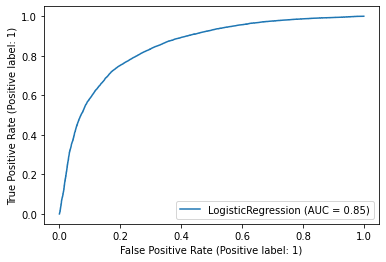

In [598]:
plot_roc_curve(lr, X_tr, y_tr)
plt.show()



## Principal Component Analysis


In [599]:
# import PCA

from sklearn.decomposition import PCA

pca = PCA(random_state=100)

# apply PCA on train data with default parameters

pca.fit(X_tr)


PCA(random_state=100)

In [600]:
X_tr_pca = pca.fit_transform(X_tr)

print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)

print(X_test_pca.shape)


(38576, 46)
(9001, 46)


In [601]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

lr_pca = LogisticRegression(C=1e9)

lr_pca.fit(X_tr_pca, y_tr)

# make the predictions on train data

y_pred_train = lr_pca.predict(X_tr_pca)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)


In [602]:

# Printing confusion matrix

print(confusion_matrix(y_tr,y_pred_train))


[[13606  5682]
 [ 3250 16038]]


In [603]:

print('Accuracy of LR with PCA on train data',acc,'\n')

print('F1 Score of LR with PCA on train data',f_1,'\n')

print('Precision Score of LR with PCA on train data',prec,'\n')

print('Recall Score of PCA LR with on train data',rec)


Accuracy of LR with PCA on train data 0.7684570717544588 

F1 Score of LR with PCA on train data 0.7821888412017166 

Precision Score of LR with PCA on train data 0.7383977900552486 

Recall Score of PCA LR with on train data 0.8315014516798009


In [604]:
# Prediction on test set

y_pred_test = lr_pca.predict(X_test_pca)

test_acc =accuracy_score(y_test,y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.71      0.82      8272
           1       0.20      0.81      0.32       729

    accuracy                           0.72      9001
   macro avg       0.59      0.76      0.57      9001
weighted avg       0.91      0.72      0.78      9001



In [605]:
print('Accuracy of LR with PCA on test data',test_acc)


Accuracy of LR with PCA on test data 0.7159204532829686


In [606]:
metric_df=pd.DataFrame({'Model':'PCA','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


In [607]:
col = list(telecom_hv_cust.columns)

In [608]:
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})

df_pca.head(10)


,PC-1,PC-2,PC-3,Feature
0,0.190181,0.365269,0.246985,arpu_6
1,0.054458,0.305698,-0.054086,onnet_mou_6
2,0.109687,0.379904,0.103905,offnet_mou_6
3,0.544851,-0.087944,-0.155201,roam_ic_mou_6
4,0.607833,-0.118546,-0.177767,roam_ic_mou_7
5,0.447631,-0.047053,-0.136348,roam_og_mou_7
6,0.015696,0.128459,0.088213,loc_og_t2t_mou_6
7,0.025387,0.200454,0.218508,loc_og_t2m_mou_6
8,0.019797,0.018346,0.170051,loc_og_t2f_mou_6
9,-0.007255,0.146699,-0.063474,loc_og_t2c_mou_6


#### Scree plot to find the optimum value of PCA components


In [609]:
#Cumulative variance explained

var_cumu = np.cumsum(pca.explained_variance_ratio_)


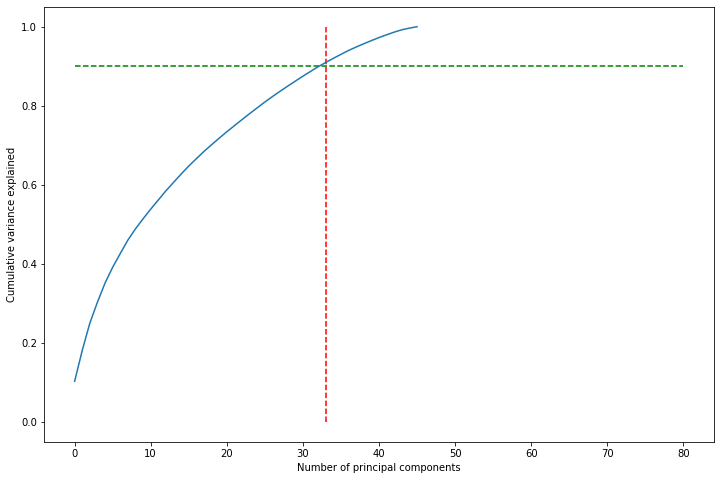

In [610]:
fig = plt.figure(figsize=[12,8])

plt.vlines(x=33, ymax=1, ymin=0, colors="r", linestyles="--")

plt.hlines(y=0.90, xmax=80, xmin=0, colors="g", linestyles="--")

plt.plot(var_cumu)

plt.xlabel('Number of principal components') 

plt.ylabel("Cumulative variance explained")

plt.show()


In [611]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# 33 columns explains 90% of the variance, lets apply PCA with 33 components


array([10.31, 18.12, 25.01, 30.33, 35.17, 39.15, 42.62, 46.02, 48.88,
       51.42, 53.85, 56.17, 58.48, 60.61, 62.71, 64.74, 66.6 , 68.43,
       70.13, 71.79, 73.41, 74.95, 76.48, 77.99, 79.46, 80.92, 82.31,
       83.64, 84.93, 86.2 , 87.45, 88.65, 89.84, 90.92, 91.96, 92.97,
       93.96, 94.83, 95.66, 96.46, 97.23, 97.93, 98.61, 99.2 , 99.61,
       99.98])


## PCA with Optimal Components


In [612]:

pca33 = PCA(n_components=33)

df_tr_pca33 = pca33.fit_transform(X_tr)

print(df_tr_pca33.shape)

df_test_pca33 = pca33.transform(X_test)

print(df_test_pca33.shape)


(38576, 33)
(9001, 33)


In [613]:
# Let's run the model using the selected variables

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

lr_pca1 = LogisticRegression(C=1e9)

lr_pca1.fit(df_tr_pca33, y_tr)

# Prediction on train set
y_pred33_tr = lr_pca1.predict(df_tr_pca33)

acc=accuracy_score(y_tr,y_pred33_tr)

f_1=f1_score(y_tr,y_pred33_tr)

prec=precision_score(y_tr,y_pred33_tr)

rec=recall_score(y_tr,y_pred33_tr)


In [614]:
print('Accuracy of LR with Otimum PCA on train data',acc,'\n')

print('F1 Score of LR with Otimum PCA on train data',f_1,'\n')

print('Precision Score of LR with Otimum PCA on train data',prec,'\n')

print('Recall Score of PCA LR with Otimum PCA on train data',rec)


Accuracy of LR with Otimum PCA on train data 0.7442451265035255 

F1 Score of LR with Otimum PCA on train data 0.7589307530665103 

Precision Score of LR with Otimum PCA on train data 0.7177188279877993 

Recall Score of PCA LR with Otimum PCA on train data 0.8051638324346744


In [615]:
# Prediction on test set

y_pred33_test = lr_pca1.predict(df_test_pca33)

test_acc=accuracy_score(y_test,y_pred33_test)

print(classification_report(y_test,y_pred33_test))


              precision    recall  f1-score   support

           0       0.97      0.68      0.80      8272
           1       0.18      0.76      0.29       729

    accuracy                           0.69      9001
   macro avg       0.57      0.72      0.54      9001
weighted avg       0.91      0.69      0.76      9001



In [616]:
print('Accuracy of LR with Otimum PCA on test data',test_acc)

Accuracy of LR with Otimum PCA on test data 0.691145428285746


In [617]:
metric_df=pd.DataFrame({'Model':'Optimum PCA','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])
metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


## # Decision Tree Classifier


In [618]:

# import decision tree libraries

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable

dt1 = DecisionTreeClassifier(max_depth=5)

dt1.fit(X_tr, y_tr)


DecisionTreeClassifier(max_depth=5)

In [619]:

# lets see the classification reort of the model built

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions on train set

y_pred_tr = dt1.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)


In [620]:

print('Accuracy of Decision Tree on train data',acc,'\n')

print('F1 Score ofDecision Tree on train data',f_1,'\n')

print('Precision Score of Decision Tree on train data',prec,'\n')

print('Recall Score of Decision Tree on train data',rec)


Accuracy of Decision Tree on train data 0.7684570717544588 

F1 Score ofDecision Tree on train data 0.7821888412017166 

Precision Score of Decision Tree on train data 0.7383977900552486 

Recall Score of Decision Tree on train data 0.8315014516798009


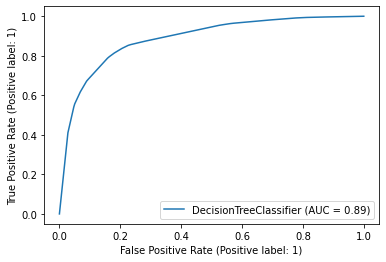

In [621]:
plot_roc_curve(dt1, X_tr, y_tr)

plt.show()


In [622]:
# Model predictions on test set
y_pred_test = dt1.predict(X_test)
test_acc=accuracy_score(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8272
           1       0.25      0.70      0.37       729

    accuracy                           0.81      9001
   macro avg       0.61      0.76      0.63      9001
weighted avg       0.91      0.81      0.85      9001



In [623]:
print('Accuracy of Decision Tree on test data',test_acc)

Accuracy of Decision Tree on test data 0.8085768247972448


In [624]:
metric_df=pd.DataFrame({'Model':'DT','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])
metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


## Hyperparameter tuning on Decision Tree Classifier


In [625]:
# GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV


In [626]:
dt1 = DecisionTreeClassifier()

# Range of hyperparameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    
}
grid_search = GridSearchCV(estimator=dt1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [627]:
%%time

grid_search.fit(X_tr, y_tr)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 10.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [628]:

grid_search.best_score_


0.872848403152219

In [629]:

grid_search.best_estimator_


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [630]:

dt_best = grid_search.best_estimator_

# Build the model on optimal parameters

dt_best.fit(X_tr, y_tr)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [631]:

# Prediction on train set

y_pred_tr = dt_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)


In [632]:

print('Accuracy of Hyperparameter tuned Decision Tree on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned Decision Tree on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned Decision Tree on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned Decision Tree on train data',rec)


Accuracy of Hyperparameter tuned Decision Tree on train data 0.7684570717544588 

F1 Score of Hyperparameter tuned Decision Tree on train data 0.7821888412017166 

Precision Score of Hyperparameter tuned Decision Tree on train data 0.7383977900552486 

Recall Score of Hyperparameter tuned Decision Tree on train data 0.8315014516798009


In [633]:

# Model predictions on test set

y_pred_test = dt_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_test)

# classification report

print(classification_report(y_tr, y_pred_tr))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19288
           1       0.96      0.96      0.96     19288

    accuracy                           0.96     38576
   macro avg       0.96      0.96      0.96     38576
weighted avg       0.96      0.96      0.96     38576



In [634]:

print('Accuracy of Hyperparameter tuned Decision Tree on test data',test_acc)


Accuracy of Hyperparameter tuned Decision Tree on test data 0.8460171092100878


In [635]:

metric_df=pd.DataFrame({'Model':'Tuned DT','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Random Forest Classifier


In [636]:

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)

rf=rf.fit(X_tr,y_tr)


In [637]:

# Prediction on train set

y_pred_tr = rf.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)

# classification report

print(classification_report(y_tr, y_pred_tr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19288
           1       1.00      1.00      1.00     19288

    accuracy                           1.00     38576
   macro avg       1.00      1.00      1.00     38576
weighted avg       1.00      1.00      1.00     38576



In [638]:

print('Accuracy of Random Forest on train data',acc,'\n')

print('F1 Score of Random Forest on train data',f_1,'\n')

print('Precision Score of Random Forest on train data',prec,'\n')

print('Recall Score of Random Forest on train data',rec)


Accuracy of Random Forest on train data 1.0 

F1 Score of Random Forest on train data 1.0 

Precision Score of Random Forest on train data 1.0 

Recall Score of Random Forest on train data 1.0


In [672]:
# Model predictions on test set

y_pred_test = rf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

# classification report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8272
           1       0.47      0.48      0.47       729

    accuracy                           0.91      9001
   macro avg       0.71      0.72      0.71      9001
weighted avg       0.91      0.91      0.91      9001



In [673]:

print('Accuracy of Random Forest on test data',test_acc)


Accuracy of Random Forest on test data 0.9135651594267303


In [641]:

metric_df=pd.DataFrame({'Model':'RF','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Hyperparameter tuning on Random Forest Classifier


In [642]:

# Range of hyperparameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}


In [643]:

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [644]:

%%time

grid_search.fit(X_tr, y_tr)


Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 2min 51s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [645]:

grid_search.best_score_


0.9321598921609291

In [646]:

rf_best = grid_search.best_estimator_

rf_best


RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [647]:
# Build final model on best estimator of Grid search CV

rf_best.fit(X_tr,y_tr)

y_pred_tr = rf_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)


In [648]:

print('Accuracy of Hyperparameter tuned Random Forest on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned Random Forest on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned Random Forest on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned Random Forest on train data',rec)


Accuracy of Hyperparameter tuned Random Forest on train data 0.9793394856905848 

F1 Score of Hyperparameter tuned Random Forest on train data 0.9794920618583228 

Precision Score of Hyperparameter tuned Random Forest on train data 0.9723116219667943 

Recall Score of Hyperparameter tuned Random Forest on train data 0.9867793446702613


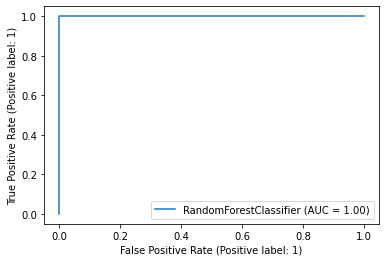

In [649]:

# ROC Curve

plot_roc_curve(rf, X_tr, y_tr)

plt.show()


In [650]:
# Prediction on test set

y_pred_test = rf_best.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8272
           1       0.43      0.54      0.48       729

    accuracy                           0.91      9001
   macro avg       0.70      0.74      0.72      9001
weighted avg       0.92      0.91      0.91      9001



In [651]:

print('Accuracy of Hyperparameter tuned Random Forest on test data',test_acc)


Accuracy of Hyperparameter tuned Random Forest on test data 0.9057882457504721


In [652]:

metric_df=pd.DataFrame({'Model':'Tuned RF','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## XGBoost Classifier


In [653]:
# Build the XGBoost model
#import xgboost as xgb
#from xgboost.xgbclassifier import XGBClassifier 
from xgboost import XGBClassifier

xgbclf=XGBClassifier()

xgbclf.fit(X_tr, y_tr)


[18:41:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [654]:

# Prediction on train set

y_pred_tr=xgbclf.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)


In [655]:

print('Accuracy of XGBoost on train data',acc,'\n')

print('F1 Score of XGBoost on train data',f_1,'\n')

print('Precision Score of XGBoost on train data',prec,'\n')

print('Recall Score of XGBoost on train data',rec)


Accuracy of XGBoost on train data 0.9824761509746993 

F1 Score of XGBoost on train data 0.982370123096182 

Precision Score of XGBoost on train data 0.9883501259445844 

Recall Score of XGBoost on train data 0.9764620489423476


In [656]:
# Prediction on test set

y_pred_test=xgbclf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8272
           1       0.50      0.42      0.45       729

    accuracy                           0.92      9001
   macro avg       0.72      0.69      0.70      9001
weighted avg       0.91      0.92      0.92      9001



In [657]:

print('Accuracy of XGBoost on test data',test_acc)


Accuracy of XGBoost on test data 0.9185646039328963


In [658]:

metric_df=pd.DataFrame({'Model':'XGB','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


In [659]:

print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=xgbclf.predict_proba(X_tr)[:, 1]))

AUC on train data by XGBoost = 0.9986318517832945



## Hyperparameter tuning with XGBoost Classifier


In [660]:
# Creating KFold object 

folds = 5

# Range of hyperparameters

param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# Select the model

xgb_model = XGBClassifier()

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# Fit the model
model_cv.fit(X_tr, y_tr)     

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [662]:
# Model best score by GridSearch CV

model_cv.best_score_


0.9465495135643268

In [663]:
# Build final model on best estimator of Grid search CV

xgb_best=model_cv.best_estimator_


In [664]:
# Fit the optimum XGB model

xgb_best.fit(X_tr, y_tr)


[18:43:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [665]:
# Prediction on train set

y_pred_tr = xgb_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)


In [666]:
print('Accuracy of Hyperparameter tuned XGBoost on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned XGBoost on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned XGBoost on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned XGBoost on train data',rec)


Accuracy of Hyperparameter tuned XGBoost on train data 0.9721070095396102 

F1 Score of Hyperparameter tuned XGBoost on train data 0.971974787727249 

Precision Score of Hyperparameter tuned XGBoost on train data 0.9766042081021669 

Recall Score of Hyperparameter tuned XGBoost on train data 0.9673890501866446


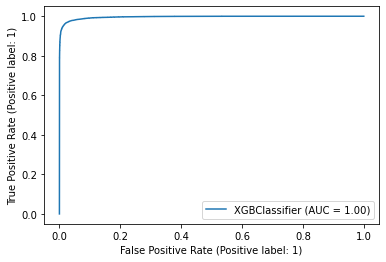

In [667]:
plot_roc_curve(xgb_best, X_tr, y_tr)

plt.show()


In [668]:
# Prediction on test set

y_pred_test=xgbclf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8272
           1       0.50      0.42      0.45       729

    accuracy                           0.92      9001
   macro avg       0.72      0.69      0.70      9001
weighted avg       0.91      0.92      0.92      9001



In [669]:

print('Accuracy of hyperparameter tuned XGBoost on test data',test_acc)


Accuracy of hyperparameter tuned XGBoost on test data 0.9185646039328963


In [670]:
metric_df=pd.DataFrame({'Model':'Tuned XGB','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])
metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


### The Final Score Card for different Models:


In [671]:
metric_df_final.round(4)

,Model,Train Accuracy,Recall,Precision,F1_Score,Test Accuracy
0,LR w/o Balancing,0.9206,0.0584,0.6410,0.1071,0.9200
1,LR w.Class Balancing,0.7074,0.8032,0.1915,0.3092,0.7097
2,LR w.SMOTE Balancing,0.7682,0.8310,0.7383,0.7819,0.7160
3,GLM/RFE,0.7667,0.8302,0.7367,0.7806,0.7100
4,PCA,0.7685,0.8315,0.7384,0.7822,0.7159
5,Optimum PCA,0.7442,0.8052,0.7177,0.7589,0.6911
6,DT,0.7685,0.8315,0.7384,0.7822,0.8086
7,Tuned DT,0.7685,0.8315,0.7384,0.7822,0.8460
8,RF,1.0000,1.0000,1.0000,1.0000,0.9136
9,Tuned RF,0.9793,0.9868,0.9723,0.9795,0.9058



# Conclusions

-  Decrease in Total data recharge amount and Maximum recharge amount in month 8 is a strong indicator of churn.

-  Decrease in 2G usage for Month 8 shows an increase trend of churn.

-  Decrease in incoming and outgoing special calls in month 8 shows high churn probability.

-  In general overall decrease in all kind of outgoing calls indicates a potential churn.

-  New customers tend to churn easily.

- Churn customers are using more roaming outgoing calls, generating more average revenue per user as compared to Non-Churn customers. Hence, they seem to be a part of customer-base frequently travelling between different circles.

-  XGBoost and Random Forest produced the best prediction scores.

-  Logistic Regression with SMOTE balancing produced the best interpretable model with 29 variables.

-  Age on Network for Churn customers is also less as compared to Non-churn customers.

-------------------- END-------------------------------------------------------------------------------------------------------